In [1]:
from keras.datasets import fashion_mnist
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

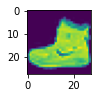

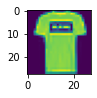

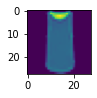

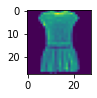

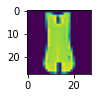

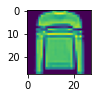

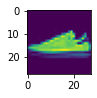

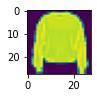

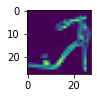

In [2]:
from matplotlib import pyplot as plt
for i in range(9):
  plt.subplot(330 + 1 + i)
  plt.imshow(x_train[i])
  plt.show()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_test.shape

(10000, 28, 28)

In [5]:
from tensorflow.keras.utils import to_categorical
from keras.utils import np_utils
x_train= x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train/=255
x_test/=255
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

In [6]:
from keras.backend import dropout
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
model=Sequential()
model.add(Dense(512,activation='relu',input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                5

In [7]:
from tensorflow.keras.optimizers import SGD
opt = SGD(lr = 0.01, momentum = 0.9)
model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])
history = model.fit(x_train,y_train,batch_size=128,epochs = 50,verbose = 1,validation_data=[x_test,y_test])

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


469/469 [==============================] - 12s 25ms/step - loss: 0.6906 - accuracy: 0.7542 - val_loss: 0.4653 - val_accuracy: 0.8329
Epoch 2/50
469/469 [==============================] - 11s 24ms/step - loss: 0.4458 - accuracy: 0.8393 - val_loss: 0.4120 - val_accuracy: 0.8505
Epoch 3/50
469/469 [==============================] - 13s 28ms/step - loss: 0.3981 - accuracy: 0.8575 - val_loss: 0.3911 - val_accuracy: 0.8599
Epoch 4/50
469/469 [==============================] - 11s 23ms/step - loss: 0.3715 - accuracy: 0.8659 - val_loss: 0.3730 - val_accuracy: 0.8634
Epoch 5/50
469/469 [==============================] - 11s 23ms/step - loss: 0.3517 - accuracy: 0.8715 - val_loss: 0.3624 - val_accuracy: 0.8655
Epoch 6/50
469/469 [==============================] - 11s 23ms/step - loss: 0.3372 - accuracy: 0.8764 - val_loss: 0.3808 - val_accuracy: 0.8629
Epoch 7/50
469/469 [==============================] - 11s 23ms/step - loss: 0.3241 - accuracy: 0.8813 - val_loss: 0.3542 - val_accuracy: 0.8706
Epo

In [8]:
score=model.evaluate(x_test,y_test,verbose=0)
print('sai so kiem tra la:',score[0])
print('do chinh xac kiem tra la:',score[1])

sai so kiem tra la: 0.3326098620891571
do chinh xac kiem tra la: 0.8985999822616577


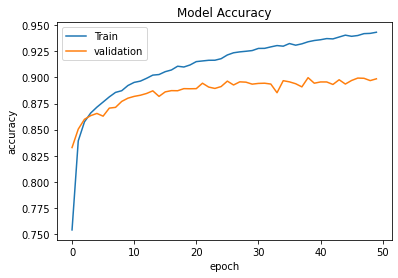

In [9]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','validation'],loc='upper left')
plt.show()

In [10]:
model.save('fashion.h5')

In [ ]:
from tensorflow.keras.models import load_model
model1=load_model('fashion.h5')